# <p style="background-color:orange;color:black;font-size:120%;text-align:center;border-radius:10px 10px;font-weight:bold;border:0px solid #800080;">Loan Prediction Using Machine Learning</p>

# 🎯Step-1) Business Problem Understanding
Future Dream Finance company deals in all kinds of home loans.They have presence across all urban,semi urban and rural areas. Customer 1st applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online application form.These details are Gender,Marital Status,Education,Number of Dependents,income,loan amount,Credit History and others.To automate this process.They process,they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### ⚒️<u> Importing Required Python Libraries </u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 🎯Step-2) Data Understanding

#### ⭐ Data Collection

In [2]:
Loan_data=pd.read_csv("C:\\Users\\HP\\Downloads\\LoanData.csv")
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
Loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### ⭐ Dataset Understanding

* Loan_ID: Unique Loan ID
* Gender: Male/Female
* Married: Applicant married(Y/N)
* Dependents: No.of family member depend on salary
* Education: Applicants Education (Graduate/ Under Graduate)
* Self_Employed: Self employed(Y/N)
* ApplicantIncome: Applicant income
* CoapplicantIncome:Coapplicant income
* LoanAmount: Loan amount in thousands of dollars
* Loan_Amount_Term: Term of loan in months
* Credit_History: Credit history meets guidelines yes or no (taking money from outside also called depth amount)
* Property_Area: Urban/semi Urban/Rural
* Loan_Status: Loan approved(Y/N) target variable


In [5]:
Loan_data['Loan_ID'].nunique() 

614

In [6]:
Loan_data.drop(columns=['Loan_ID'],inplace=True)

In [7]:
Loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
Loan_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
Loan_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
Loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
Loan_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
Loan_data['ApplicantIncome'].nunique()

505

In [13]:
Loan_data['Loan_Amount_Term'].nunique()

10

In [14]:
Loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
Loan_data['Credit_History'].unique()

array([ 1.,  0., nan])

* For understanding replacing 1 to good & 0 to bad

In [16]:
Loan_data['Credit_History']=Loan_data['Credit_History'].replace({1:"good",0:"bad"})

In [17]:
Loan_data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [18]:
Loan_data['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [19]:
Loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
Loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
continous=['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count=['Dependents','Loan_Amount_Term'] 

### 📌Exploratory Data Analysis (EDA)

In [22]:
Loan_data[continous].describe().T.round(2).style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.460000,6109.040000,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.250000,2926.250000,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.410000,85.590000,9.000000,100.000000,128.000000,168.000000,700.000000


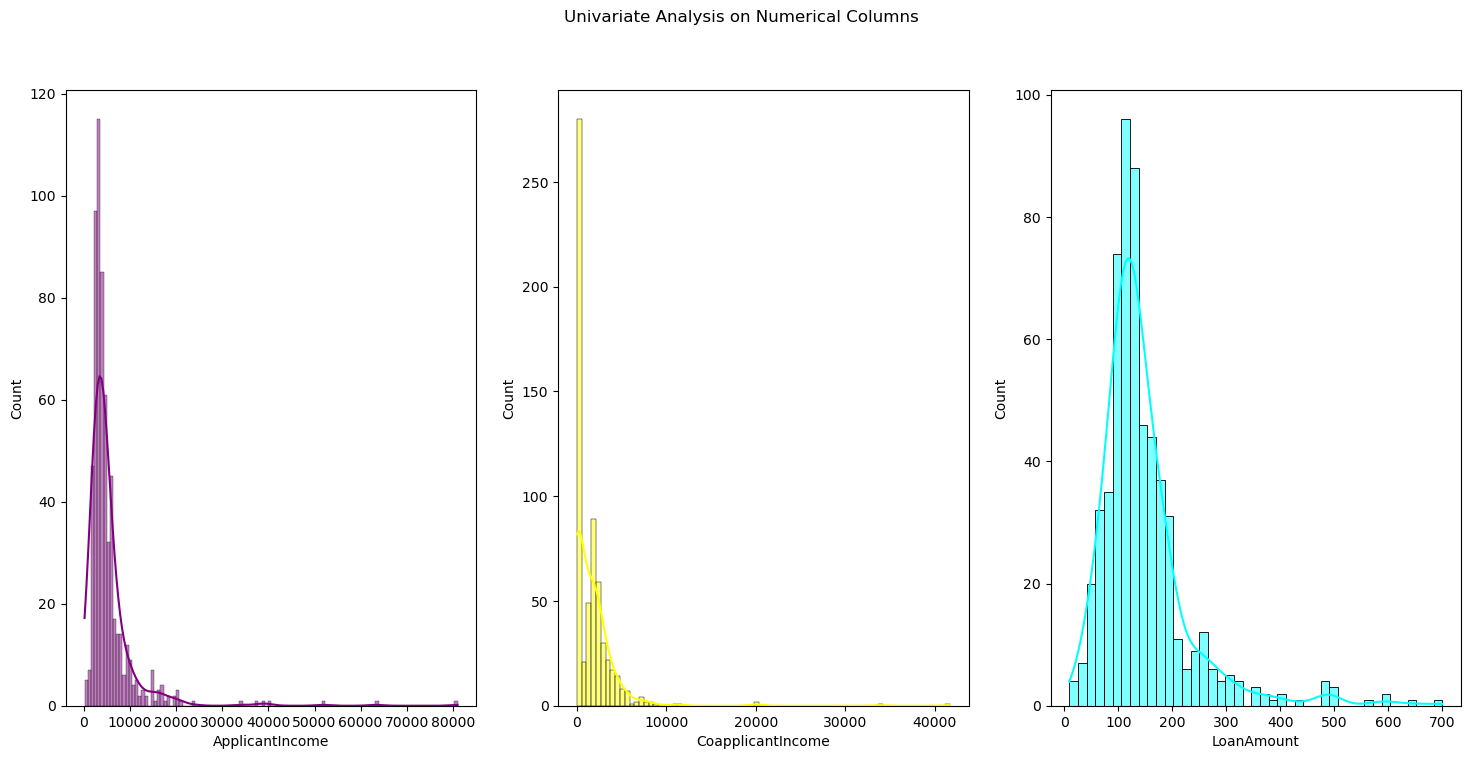

In [23]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(Loan_data['ApplicantIncome'],kde=True,color='purple')

plt.subplot(1,3,2)
sns.histplot(Loan_data['CoapplicantIncome'],kde=True,color='yellow')

plt.subplot(1,3,3)
sns.histplot(Loan_data['LoanAmount'],kde=True,color='cyan')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

**🔔 Our Observation**

* It is a Right Skew => Mean > Median

* From curve we observe that high Applicantincome have very less people and less income have more people 

In [24]:
Loan_data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

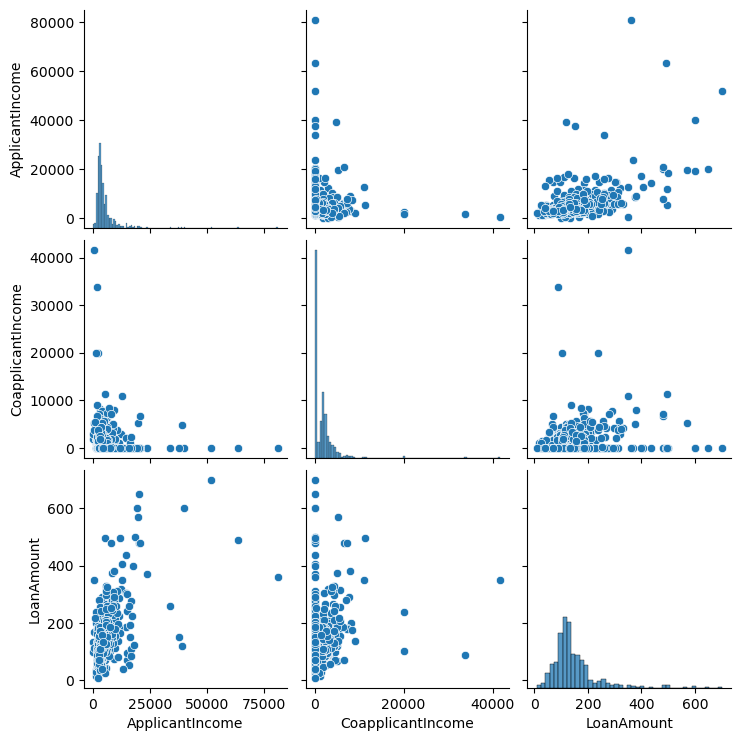

In [25]:
sns.pairplot(Loan_data[continous])
plt.show()

<Axes: >

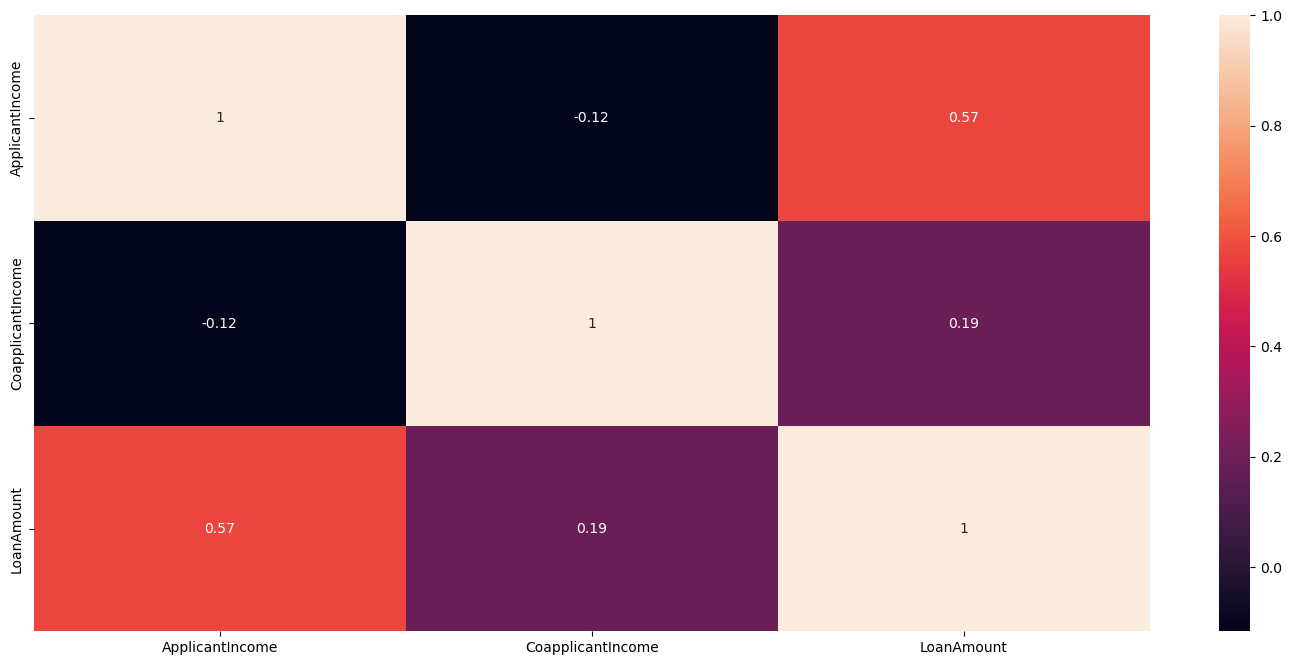

In [26]:
sns.heatmap(Loan_data[continous].corr(),annot=True)

**🔔 Our Observation**

* we observe relation between Applicant income and loan amount is high.

### 🥨Outliers tretment
* we retrain the outliers as it is , we should not modify outliers in this case.Bez for high amount of income - high amount of loan will be their, keep them as it is.

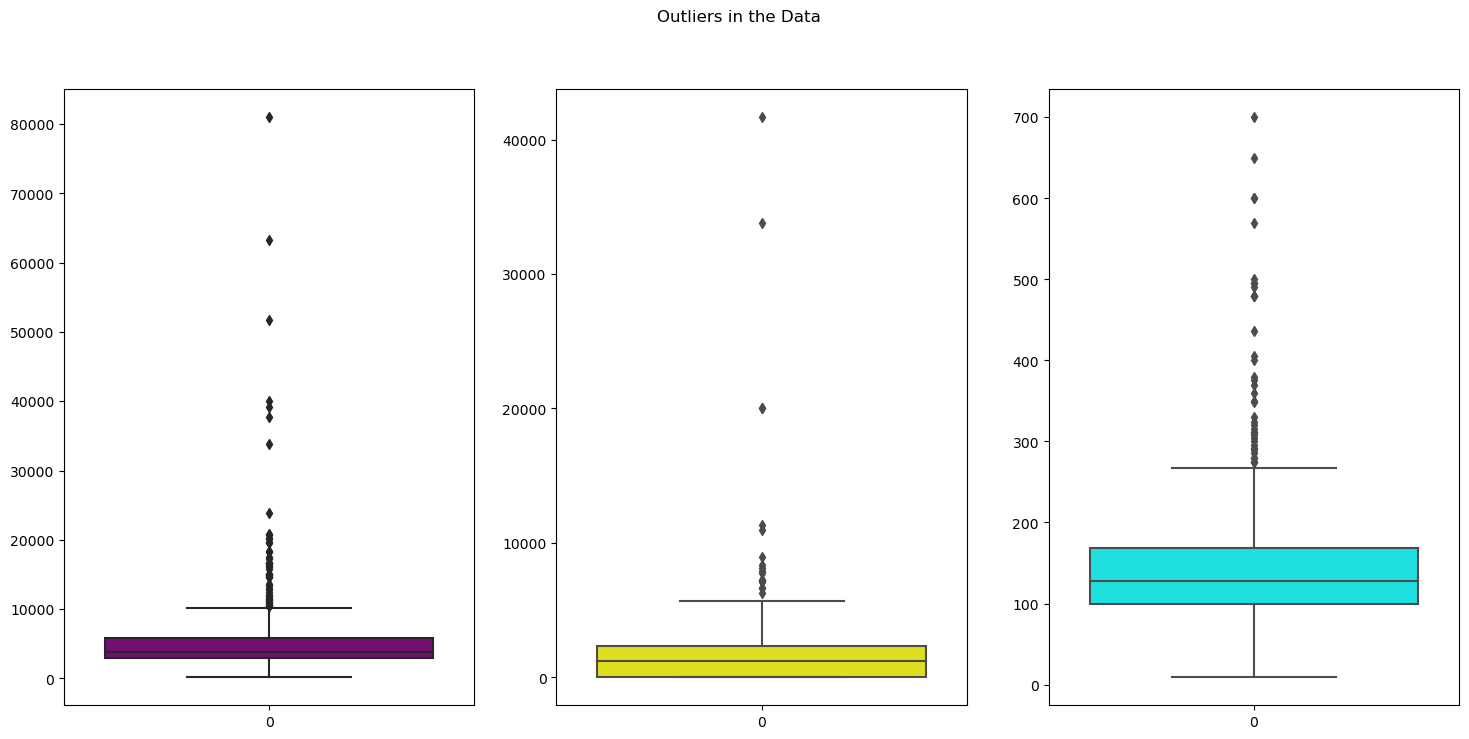

In [27]:
# lets visualize the outliers using Box plot

plt.subplot(1,3,1)
sns.boxplot(Loan_data['ApplicantIncome'],color='purple')

plt.subplot(1,3,2)
sns.boxplot(Loan_data['CoapplicantIncome'],color='yellow')

plt.subplot(1,3,3)
sns.boxplot(Loan_data['LoanAmount'],color='cyan')

plt.suptitle('Outliers in the Data')
plt.show()

In [28]:
Loan_data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


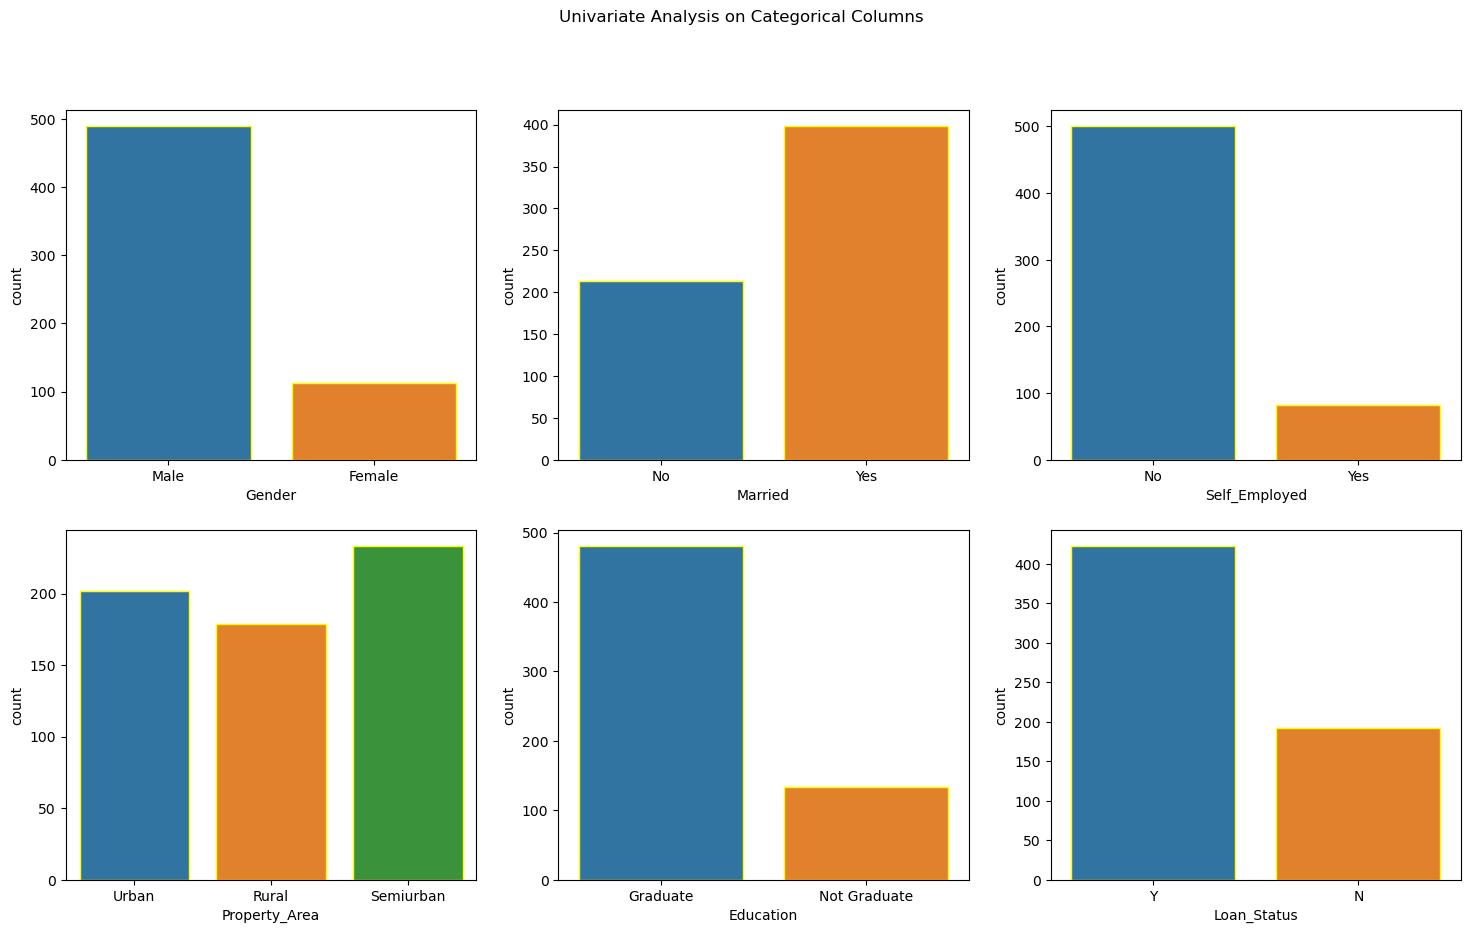

In [29]:
plt.rcParams["figure.figsize"]=(18,10)

plt.subplot(2,3,1)
sns.countplot(data=Loan_data,x="Gender",ec="yellow")

plt.subplot(2,3,2)
sns.countplot(data=Loan_data,x="Married",ec="yellow")

plt.subplot(2,3,3)
sns.countplot(data=Loan_data,x="Self_Employed",ec="yellow")

plt.subplot(2,3,4)
sns.countplot(data=Loan_data,x="Property_Area",ec="yellow")

plt.subplot(2,3,5)
sns.countplot(data=Loan_data,x="Education",ec="yellow")

plt.subplot(2,3,6)
sns.countplot(data=Loan_data,x="Loan_Status",ec="yellow")

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

# 🎯Step-3) Data Preparation

* combine column bez loan amount is dependent on ApplicantIncome and CoapplicantIncome.

In [30]:
Loan_data["Income"]=Loan_data['ApplicantIncome']+Loan_data['CoapplicantIncome']

Loan_data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

#### 🏵️Modifiying the wrong data

In [31]:
Loan_data['Dependents']=Loan_data['Dependents'].replace({'3+':3})

#### 🏵️Missing Values Treatment

In [32]:
Loan_data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [33]:
Loan_data.isnull().sum()/len(Loan_data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

* every-data has less than 30% so everything has to be replace.
* you can't replace Income (ApplicantIncome + CoapplicantIncome),Loan_Amount,Loan_Amount_term,Credit_History bez loan is accepted or rejected is dependent on applicant income. 
* loanAmount and loan_amount_term we drop rows whose having no value (empty).
* remaining cloumn replace

* We don't know what is the exact income & we can't put average for it, that's why we drop that row which having missing value.

In [34]:
Loan_data=Loan_data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

* If any 1 not fill the dependents column so just consider it 0.

In [35]:
#count variable replace with 0
Loan_data['Dependents']=Loan_data['Dependents'].fillna(0)

In [36]:
Loan_data['Gender']=Loan_data['Gender'].fillna(Loan_data['Gender'].mode()[0])

Loan_data['Married']=Loan_data['Married'].fillna(Loan_data['Married'].mode()[0])

Loan_data['Self_Employed']=Loan_data['Self_Employed'].fillna(Loan_data['Self_Employed'].mode()[0])


In [37]:
Loan_data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

## 📌Data Wrangling

#### Encoding

In [38]:
Loan_data['Gender']=Loan_data['Gender'].map({'Male':1, 'Female':0}).astype('int')
Loan_data['Married'] = Loan_data['Married'].map({'Yes':1, 'No':0}).astype('int')
Loan_data['Education'] = Loan_data['Education'].map({'Graduate':1, 'Not Graduate':0}).astype('int')
Loan_data['Self_Employed'] = Loan_data['Self_Employed'].map({'Yes':1, 'No':0}).astype('int')
Loan_data['Property_Area'] = Loan_data['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2}).astype('int')
Loan_data['Credit_History'] = Loan_data['Credit_History'].map({'good':1,'bad':0}).astype('int')
Loan_data['Loan_Status'] = Loan_data['Loan_Status'].map({'Y':1, 'N':0}).astype('int')

### 📌Data Type Conversion

In [39]:
Loan_data['Dependents']=Loan_data['Dependents'].astype('int')
Loan_data['Loan_Amount_Term']=Loan_data['Loan_Amount_Term'].astype('int')

### 📌Transformations

In [40]:
Loan_data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [41]:
from scipy.stats import boxcox
Loan_data['Income'],a=boxcox(Loan_data['Income'])
Loan_data['LoanAmount'],c=boxcox(Loan_data['LoanAmount'])

In [42]:
Loan_data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

**🔔Our Observation**
* Both Income & LoanAmount are almost close to normal distribution.

In [43]:
Loan_data['Loan_Amount_Term']=Loan_data['Loan_Amount_Term']/12

In [44]:
Loan_data['Loan_Amount_Term'].unique()

array([30., 10., 15.,  5., 25., 40., 20.,  3.,  7.])

In [45]:
Loan_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1,1.866991


#### ⭐X & Y

In [46]:
X=Loan_data.drop('Loan_Status',axis=1)
y=Loan_data['Loan_Status']

### 🪓Train-Test-Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

In [48]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
1,1,1,1,1,0,6.243267,30.0,1,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1.868932
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1.866991


In [49]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int32

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    int32  
 1   Married           529 non-null    int32  
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    int32  
 4   Self_Employed     529 non-null    int32  
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    int32  
 8   Property_Area     529 non-null    int32  
 9   Income            529 non-null    float64
dtypes: float64(3), int32(7)
memory usage: 31.0 KB


In [51]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 529 entries, 1 to 613
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
529 non-null    int32
dtypes: int32(1)
memory usage: 6.2 KB


# 🎯Step 4)& 5)Machine Learning Modelling & Evaluation

### 🥏ML algorithm- 1.Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

log_model=LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train=log_model.predict(X_train)
ypred_test=log_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


### 🥏 ML Algorithm - 2. KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model=knn_grid.best_estimator_

ypred_train=knn_model.predict(X_train)
ypred_test=knn_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7541371158392435
Cross validation score: 0.7375910364145659
Test Accuracy: 0.7075471698113207


In [54]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

### 🥏ML Algorithm - 3. Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC

estimator =SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}


from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model=svm_grid.best_estimator_

ypred_train=svm_model.predict(X_train)
ypred_test=svm_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [56]:
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

### 🥏ML Algorithm - 4.Decision Tree Classifier

**🔸HPT(Hyperparameter Tunning / Optimization)**

In [57]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=70)
param_grid={"criterion":["gini","entropy"],
           "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

# identify the best model
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=70)

### Dimension Reduction (identify imp features)

In [58]:
#identify the importance of each feature
dt_fi=dt.feature_importances_

# identify the features where the feature importance is greater than 0
index=[i for i,X in enumerate(dt_fi) if X>0]

# create new dataset with important features
X_train_dt=X_train.iloc[:,index]
X_test_dt=X_test.iloc[:,index]

# train with best model & with important features
dt.fit(X_train_dt,y_train)

ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(dt,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8226950354609929
Cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [59]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

In [60]:
X_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1


### 🥏ML Algorithm - 5.Random forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=70)
param_grid={'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

# identify the best model
rf=rf_grid.best_estimator_

#identify the importance of each feature
rf_fi=rf.feature_importances_

# identify the features where the feature importance is greater than 0
index=[i for i,X in enumerate(rf_fi) if X>0]

# create new dataset with important features
X_train_rf=X_train.iloc[:,index]
X_test_rf=X_test.iloc[:,index]

# train with best model & with important features
rf.fit(X_train_rf,y_train)

ypred_train=rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.9905437352245863
Cross validation score: 0.8063025210084034
Test Accuracy: 0.7641509433962265


### 🥏ML Algorithm - 6.AdaBoost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=70)
param_grid={'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

# identify the best model
ab=ab_grid.best_estimator_

#identify the importance of each feature
ab_fi=ab.feature_importances_

# identify the features where the feature importance is greater than 0
index=[i for i,X in enumerate(rf_fi) if X>0]

# create new dataset with important features
X_train_ab=X_train.iloc[:,index]
X_test_ab=X_test.iloc[:,index]

# train with best model & with important features
ab.fit(X_train_ab,y_train)

ypred_train=ab.predict(X_train_ab)
ypred_test=ab.predict(X_test_ab)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.83451536643026
Cross validation score: 0.8322408963585435
Test Accuracy: 0.7641509433962265


###  🥏ML Algorithm - 7. Gradient Boost Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=70)
param_grid={'n_estimators':list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9]}

from sklearn.model_selection import GridSearchCV
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

# identify the best model
gb=gb_grid.best_estimator_

#identify the importance of each feature
gb_fi=gb.feature_importances_

# identify the features where the feature importance is greater than 0
index=[i for i,X in enumerate(gb_fi) if X>0]

# create new dataset with important features
X_train_gb=X_train.iloc[:,index]
X_test_gb=X_test.iloc[:,index]

# train with best model & with important features
gb.fit(X_train_gb,y_train)

ypred_train=gb.predict(X_train_gb)
ypred_test=gb.predict(X_test_gb)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8747044917257684
Cross validation score: 0.8180952380952382
Test Accuracy: 0.7358490566037735


### 🥏ML Algorithm - 8.XGBoost classifier

In [64]:
from xgboost import XGBClassifier
estimator=XGBClassifier(random_state=70)
param_grid={'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)

# identify the best model
xgb=xgb_grid.best_estimator_

#identify the importance of each feature
xgb_fi=xgb.feature_importances_

# identify the features where the feature importance is greater than 0
index=[i for i,X in enumerate(xgb_fi) if X>0]

# create new dataset with important features
X_train_xgb=X_train.iloc[:,index]
X_test_xgb=X_test.iloc[:,index]

# train with best model & with important features
xgb.fit(X_train_xgb,y_train)

ypred_train=xgb.predict(X_train_xgb)
ypred_test=xgb.predict(X_test_xgb)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8557919621749409
Cross validation score: 0.8275070028011206
Test Accuracy: 0.7735849056603774


### 🥏ML Algorithm - 9 Naive Bayes

In [65]:
# modelling
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB().fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
naive_bayes_acc = accuracy_score(y_test, y_pred_nb)

# Evaluate the best model
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Cross validation score:",cross_val_score(nb_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Accuracy of naive_bayes is :" + str(naive_bayes_acc))

Train Accuracy: 0.8557919621749409
Cross validation score: 0.8156582633053221
Accuracy of naive_bayes is :0.7735849056603774


* From above ML algorithm Logistic,SVM & Decision Tree has same 78% Accuracy.

* Among them Logistic Regression take less time.

### ⚡Save Model

In [66]:
import joblib 

In [67]:
file_name='log_predict'

In [68]:
joblib.dump(log_model,'log_predict')

['log_predict']

# 🎯Step-6)Prediction

In [69]:
app=joblib.load('log_predict')

In [70]:
arr=[[1,1,2,1,0,6.870558,30.0,1,2,1.866991]]
acc=app.predict(arr)
acc

array([1])

### **✅This project predicted that loan status is approved for this data.**